In [0]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
%matplotlib inline

In [0]:
cd '/gdrive/My Drive/Colab Notebooks/Knight ML Assignment/Data/mydata'

/gdrive/My Drive/Colab Notebooks/Knight ML Assignment/Data/mydata


In [0]:
df=pd.read_csv('df1_train.csv')[['country', 'points', 'variety']]

In [0]:
df.columns

Index(['country', 'points', 'variety'], dtype='object')

In [0]:
df.head()

,country,points,variety
0,Australia,85,Pinot Noir
1,US,87,Pinot Noir
2,US,89,Cabernet Sauvignon
3,France,94,Bordeaux-style White Blend
4,France,87,Bordeaux-style Red Blend


In [0]:
data=pd.read_csv('/gdrive/My Drive/Colab Notebooks/Knight ML Assignment/Data/cleaned_train.csv')

In [0]:
from sklearn.preprocessing import OneHotEncoder

In [0]:
country_encoder = OneHotEncoder(categories='auto',drop='first',sparse=False,)

In [0]:
country_features = country_encoder.fit_transform(df[['country']])

In [0]:
country_features.shape

(40699, 11)

In [0]:
points_encoder = OneHotEncoder(categories='auto',drop='first',sparse=False)

In [0]:
points_features = points_encoder.fit_transform(df[['points']])

In [0]:
points_features.shape

(40699, 20)

In [0]:
features = pd.concat([pd.DataFrame(country_features),pd.DataFrame(points_features)],axis=1)

In [0]:
from joblib import dump,load

In [0]:
category_to_id = load('category_to_id.joblib')

In [0]:
labels = df['variety'].map(category_to_id)

In [0]:
category_id_df=load('category_id_df.joblib')

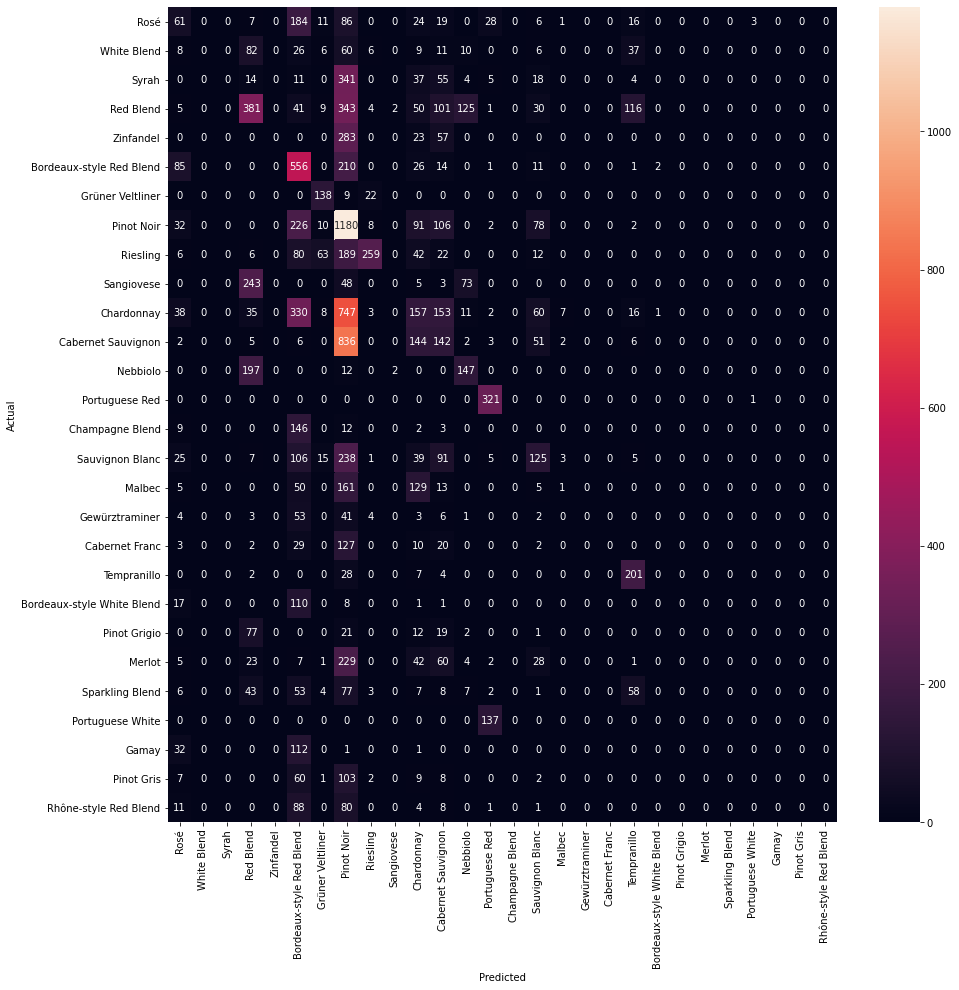

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(conf_mat, annot=True, fmt='d',xticklabels=category_id_df.variety.values, yticklabels=category_id_df.variety.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [0]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.17      0.14      0.15       446
           1       0.00      0.00      0.00       261
           2       0.00      0.00      0.00       489
           3       0.34      0.32      0.33      1208
           4       0.00      0.00      0.00       363
           5       0.24      0.61      0.35       906
           6       0.52      0.82      0.63       169
           7       0.22      0.68      0.33      1735
           8       0.83      0.38      0.52       679
           9       0.00      0.00      0.00       372
          10       0.18      0.10      0.13      1568
          11       0.15      0.12      0.13      1199
          12       0.38      0.41      0.40       358
          13       0.63      1.00      0.77       322
          14       0.00      0.00      0.00       172
          15       0.28      0.19      0.23       660
          16       0.07      0.00      0.01       364
          17       0.00    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [0]:
model.fit(features,labels)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [0]:
from joblib import dump,load

In [0]:
dump(model,'nb_numerical_features.joblib')

['nb_numerical_features.joblib']

In [0]:
dump(country_encoder,'country_encoder.joblib')

['country_encoder.joblib']

In [0]:
dump(points_encoder,'points_encoder.joblib')

['points_encoder.joblib']